# DSC 630 

### Assignment 4.2: Clustering Exercise

**Author:** Kimberly Cable<br>
**Date:** 

You will be using the dataset als_data.csv to apply clustering methods for this assignment. This data gives anonymized data on ALS patients. With this data, complete the following steps:

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Read data file
als_df = pd.read_csv("data/als_data.csv")   
als_df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [3]:
als_df.shape

(2223, 101)

In [4]:
## Display all columns in pandas dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
als_df.isnull().sum()

ID                                  0
Age_mean                            0
Albumin_max                         0
Albumin_median                      0
Albumin_min                         0
Albumin_range                       0
ALSFRS_slope                        0
ALSFRS_Total_max                    0
ALSFRS_Total_median                 0
ALSFRS_Total_min                    0
ALSFRS_Total_range                  0
ALT.SGPT._max                       0
ALT.SGPT._median                    0
ALT.SGPT._min                       0
ALT.SGPT._range                     0
AST.SGOT._max                       0
AST.SGOT._median                    0
AST.SGOT._min                       0
AST.SGOT._range                     0
Bicarbonate_max                     0
Bicarbonate_median                  0
Bicarbonate_min                     0
Bicarbonate_range                   0
Blood.Urea.Nitrogen..BUN._max       0
Blood.Urea.Nitrogen..BUN._median    0
Blood.Urea.Nitrogen..BUN._min       0
Blood.Urea.N

**1. Remove any data that is not relevant to the patient’s ALS condition.**

In [6]:
als_df = als_df.drop(['ID', 'SubjectID'], axis = 1)
als_df.shape

(2223, 99)

In [7]:
als_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 99 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age_mean                          2223 non-null   int64  
 1   Albumin_max                       2223 non-null   float64
 2   Albumin_median                    2223 non-null   float64
 3   Albumin_min                       2223 non-null   float64
 4   Albumin_range                     2223 non-null   float64
 5   ALSFRS_slope                      2223 non-null   float64
 6   ALSFRS_Total_max                  2223 non-null   int64  
 7   ALSFRS_Total_median               2223 non-null   float64
 8   ALSFRS_Total_min                  2223 non-null   int64  
 9   ALSFRS_Total_range                2223 non-null   float64
 10  ALT.SGPT._max                     2223 non-null   float64
 11  ALT.SGPT._median                  2223 non-null   float64
 12  ALT.SG

**2. Apply a standard scalar to the data.**

In [8]:
standardizer = StandardScaler()
als_scaled = standardizer.fit_transform(als_df)

**3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.**

For n_clusters = 2. The average silhouette score is 0.07887730960924653
For n_clusters = 3. The average silhouette score is 0.0687707291658565
For n_clusters = 4. The average silhouette score is 0.07083050416977762
For n_clusters = 5. The average silhouette score is 0.07563157883964931
For n_clusters = 6. The average silhouette score is 0.06151137092769171


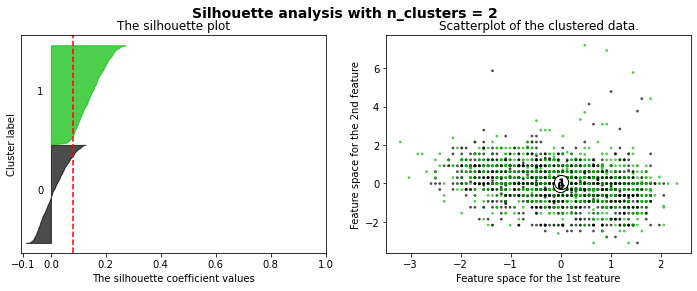

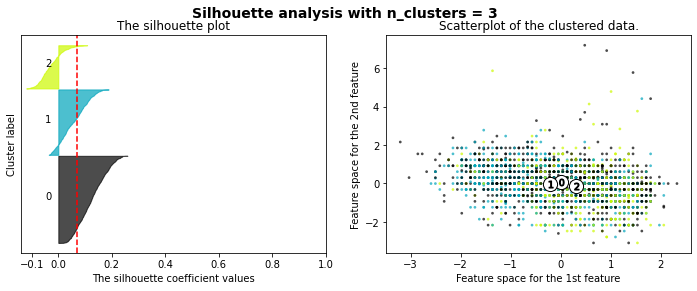

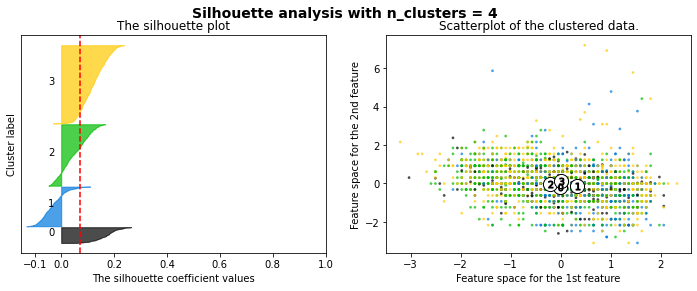

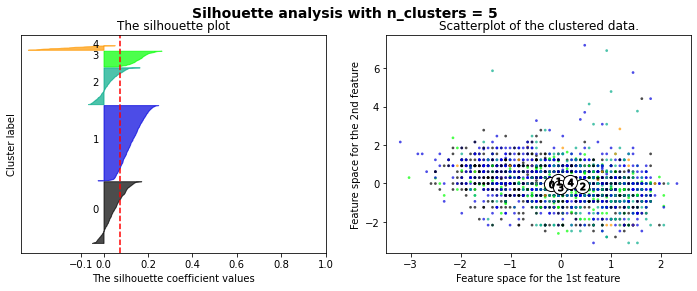

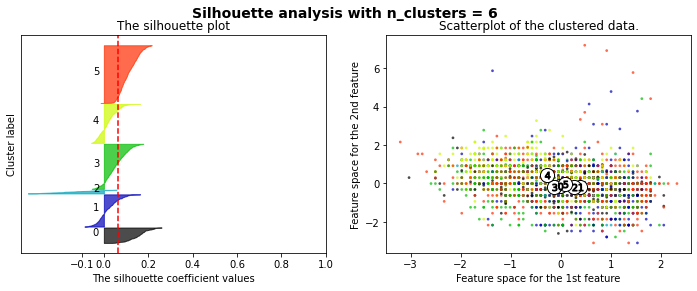

In [9]:
# Clusters for 2, 3, 4, 5, and 6
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_scores = []

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(als_scaled)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(als_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}. The average silhouette score is {silhouette_avg}")
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(als_scaled, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor = color,
            edgecolor = color,
            alpha = 0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        als_scaled[:, 0], als_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker = "o",
        c = "white",
        alpha = 1,
        s = 200,
        edgecolor = "k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker = "$%d$" % i, alpha = 1, s = 50, edgecolor = "k")

    ax2.set_title("Scatterplot of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis with n_clusters = %d"
        % n_clusters,
        fontsize = 14,
        fontweight = "bold",
    )

plt.show()

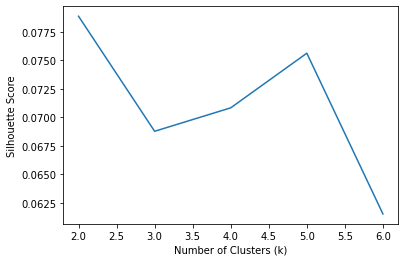

In [10]:
# Numbers of clusters in K-Maean to Silhouette Score
plt.plot(range_n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

**4. Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.**

The optimal number of clusters in 2 as the silhouette score is .79 and the thickness of each cluster is uniform compared to the others.

**5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).**

In [11]:
kmeans = KMeans(init = "random", n_clusters = 2, n_init = 10, max_iter = 300, random_state = 15)

In [12]:
kmeans.fit(als_scaled)

KMeans(init='random', n_clusters=2, random_state=15)

**6. Fit a PCA transformation with two features to the scaled data.**

In [13]:
pca = PCA(n_components = 2)

In [14]:
pca.fit(als_scaled)

PCA(n_components=2)

In [15]:
pca.transform(als_scaled)

array([[-1.42673134, -2.31932672],
       [-1.44023464, -4.87177586],
       [ 1.61785297, -0.42879563],
       ...,
       [-0.43290548,  4.24595874],
       [-0.33079273,  3.31813514],
       [ 1.46799805,  0.58195022]])

In [16]:
scores_pca = pca.transform(als_scaled)

In [17]:
# Create a new data frame with the orignial features and add the PCA scores and assigned clusters
df_scaled_pca_kmeans = pd.concat([als_df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_scaled_pca_kmeans.columns.values[-2: ] = ['Component 1', 'Component 2']

# The last column we add contains the pca k-means clustering labels
df_scaled_pca_kmeans['Segment K-Means PCA'] = kmeans.labels_

In [18]:
df_scaled_pca_kmeans.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,Chloride_min,Chloride_range,Creatinine_max,Creatinine_median,Creatinine_min,Creatinine_range,Gender_mean,Glucose_max,Glucose_median,Glucose_min,Glucose_range,hands_max,hands_median,hands_min,hands_range,Hematocrit_max,Hematocrit_median,Hematocrit_min,Hematocrit_range,Hemoglobin_max,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Component 1,Component 2,Segment K-Means PCA
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,108.0,103.0,0.020906,79.56,79.56,70.72,0.030801,1,7.4370,4.4955,4.2180,0.011216,8,7.5,6,0.005291,44.6,43.15,40.7,0.013589,156.0,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0,-1.426731,-2.319327,0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,102.0,100.0,0.013937,61.88,53.04,44.20,0.030801,1,6.7710,4.9950,4.0515,0.004738,8,6.0,6,0.003591,41.9,39.60,37.7,0.007317,138.0,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0,-1.440235,-4.871776,0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,106.0,104.0,0.007143,88.40,79.56,70.72,0.031571,2,5.6610,5.1060,4.2180,0.002577,4,1.0,0,0.007143,49.1,46.20,44.0,0.009107,161.0,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0,1.617853,-0.428796,1
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,107.0,106.0,0.007481,70.72,61.88,53.04,0.044090,2,5.1060,4.7730,4.6620,0.001107,6,5.5,4,0.004988,46.3,43.00,41.7,0.011471,154.0,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0,-1.919998,2.095575,0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23

**7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.**

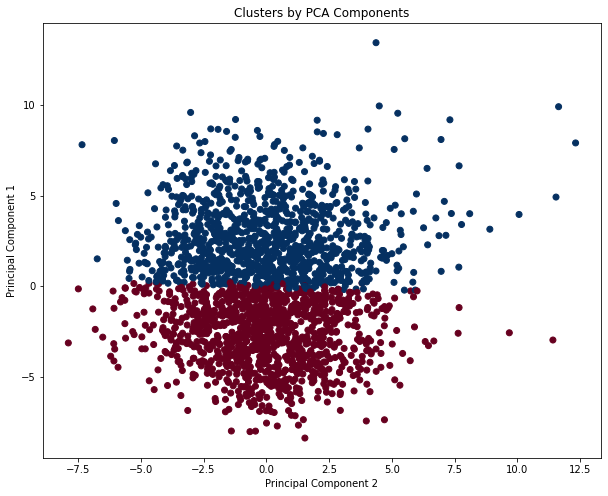

In [28]:
X = df_scaled_pca_kmeans['Component 2']
y = df_scaled_pca_kmeans['Component 1']

fig, ax = plt.subplots(figsize = (10, 8))
colormap = np.array(['r', 'g'])

ax.scatter(X, y, c = df_scaled_pca_kmeans['Segment K-Means PCA'], cmap = 'RdBu')

plt.title('Clusters by PCA Components')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 1')
plt.show()

**8. Summarize your results and make a conclusion.**

With PCA, the silhouette score of two clusters is 0.79 and does not shold two distinct clusters. After PCA, we can now see two distinct clusters. Once the correct features are determined, further analysis can proceed.